## BankSim

The objective of this casestudy is to detect the fraud. BankSim is an agent- based simulator of bank payment based on sample of aggregated transactional data provided by a bank in spain.The main purpose of BankSim is the generation of synthetic data that can be used for fraud detection research. 
URL-https://www.kaggle.com/ntnu-testimon/banksim1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
BankSim_df=pd.read_csv('C://Users//Ankur//Downloads//CaseStudy_Bank_sim//bs140513_032310.csv')
BankSim_df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [3]:
BankSim_df.shape

(594643, 10)

In [4]:
BankSim_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


#### No Missing value is present in Dataset

In [5]:
BankSim_df.describe(include='all')

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
count,594643.000000,594643,594643,594643,594643,594643,594643,594643,594643.000000,594643.000000
unique,NaN,4112,8,4,1,50,1,15,NaN,NaN
top,NaN,'C1978250683','2','F','28007','M1823072687','28007','es_transportation',NaN,NaN
freq,NaN,265,187310,324565,594643,299693,594643,505119,NaN,NaN
mean,94.986827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.890135,0.012108
std,51.053632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.402831,0.109369
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.740000,0.000000
50%,97.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.900000,0.000000
75%,139.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.540000,0.000000


In [6]:
BankSim_df.loc[BankSim_df.fraud==1]

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
88,0,'C583110837','3','M','28007','M480139044','28007','es_health',44.26,1
89,0,'C1332295774','3','M','28007','M480139044','28007','es_health',324.50,1
434,0,'C1160421902','3','M','28007','M857378720','28007','es_hotelservices',176.32,1
435,0,'C966214713','3','M','28007','M857378720','28007','es_hotelservices',337.41,1
553,0,'C1450140987','4','F','28007','M1198415165','28007','es_wellnessandbeauty',220.11,1
...,...,...,...,...,...,...,...,...,...,...
593928,179,'C2138532527','5','M','28007','M3697346','28007','es_leisure',192.78,1
594025,179,'C644541754','5','F','28007','M1748431652','28007','es_wellnessandbeauty',42.37,1
594026,179,'C245117318','3','F','28007','M1748431652','28007','es_wellnessandbeauty',521.84,1
594168,179,'C1239184141','2','F','28007','M209847108','28007','es_wellnessandbeauty',25.29,1


### 7200 are fraud records

In [7]:
length_fraud=BankSim_df.loc[BankSim_df.fraud==1].count()

In [8]:
length_fraud.sum()/len(BankSim_df)*100

12.108105199254005

~13% are in default category in whole data set

In [9]:
Fraud_customers= BankSim_df.loc[BankSim_df.fraud==1]
Fraud_customers.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
88,0,'C583110837','3','M','28007','M480139044','28007','es_health',44.26,1
89,0,'C1332295774','3','M','28007','M480139044','28007','es_health',324.50,1
434,0,'C1160421902','3','M','28007','M857378720','28007','es_hotelservices',176.32,1
435,0,'C966214713','3','M','28007','M857378720','28007','es_hotelservices',337.41,1
553,0,'C1450140987','4','F','28007','M1198415165','28007','es_wellnessandbeauty',220.11,1


In [10]:
NoDefaulters=BankSim_df.loc[BankSim_df.fraud==0]
NoDefaulters

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0
...,...,...,...,...,...,...,...,...,...,...
594638,179,'C1753498738','3','F','28007','M1823072687','28007','es_transportation',20.53,0
594639,179,'C650108285','4','F','28007','M1823072687','28007','es_transportation',50.73,0
594640,179,'C123623130','2','F','28007','M349281107','28007','es_fashion',22.44,0
594641,179,'C1499363341','5','M','28007','M1823072687','28007','es_transportation',14.46,0


#### Customers count that are non defaulter 587443 

In [11]:
BankSim_df['amount'].describe()

count    594643.000000
mean         37.890135
std         111.402831
min           0.000000
25%          13.740000
50%          26.900000
75%          42.540000
max        8329.960000
Name: amount, dtype: float64

<AxesSubplot:xlabel='amount'>

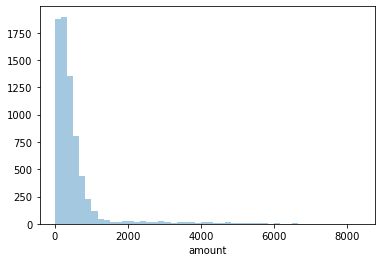

In [12]:
sns.distplot(Fraud_customers['amount'], kde=False)

- Maximun defaulters do transactions between 0-2000

<AxesSubplot:xlabel='amount'>

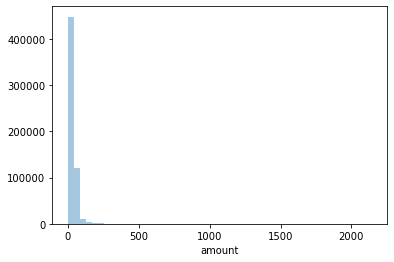

In [13]:
sns.distplot(NoDefaulters['amount'], kde=False)

- Non Defaulters do transaction of less amount as compare to defaulters

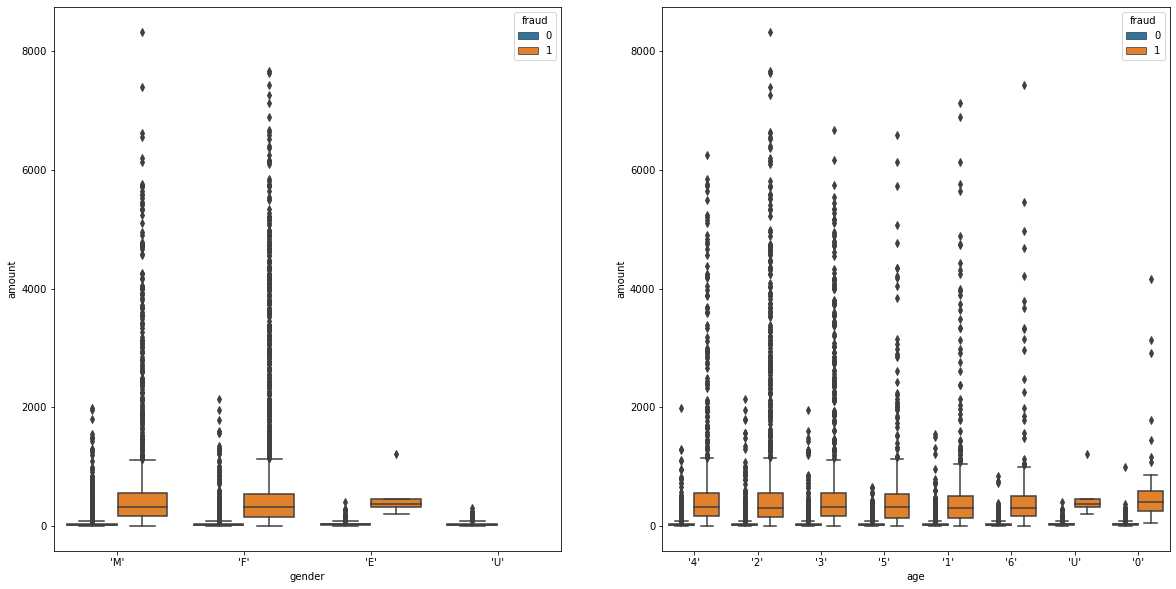

In [14]:
plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
sns.boxplot(x='gender', y='amount', hue='fraud' ,data=BankSim_df)
plt.subplot(1,2,2)
sns.boxplot(x='age', y='amount', hue='fraud',data=BankSim_df)
plt.show()

- For genders we have see so many outliers in case of non defaulters male and female categories 
- For age we have see so many outliers in case of "4", "2", "3", "5", "1".

<AxesSubplot:xlabel='category', ylabel='amount'>

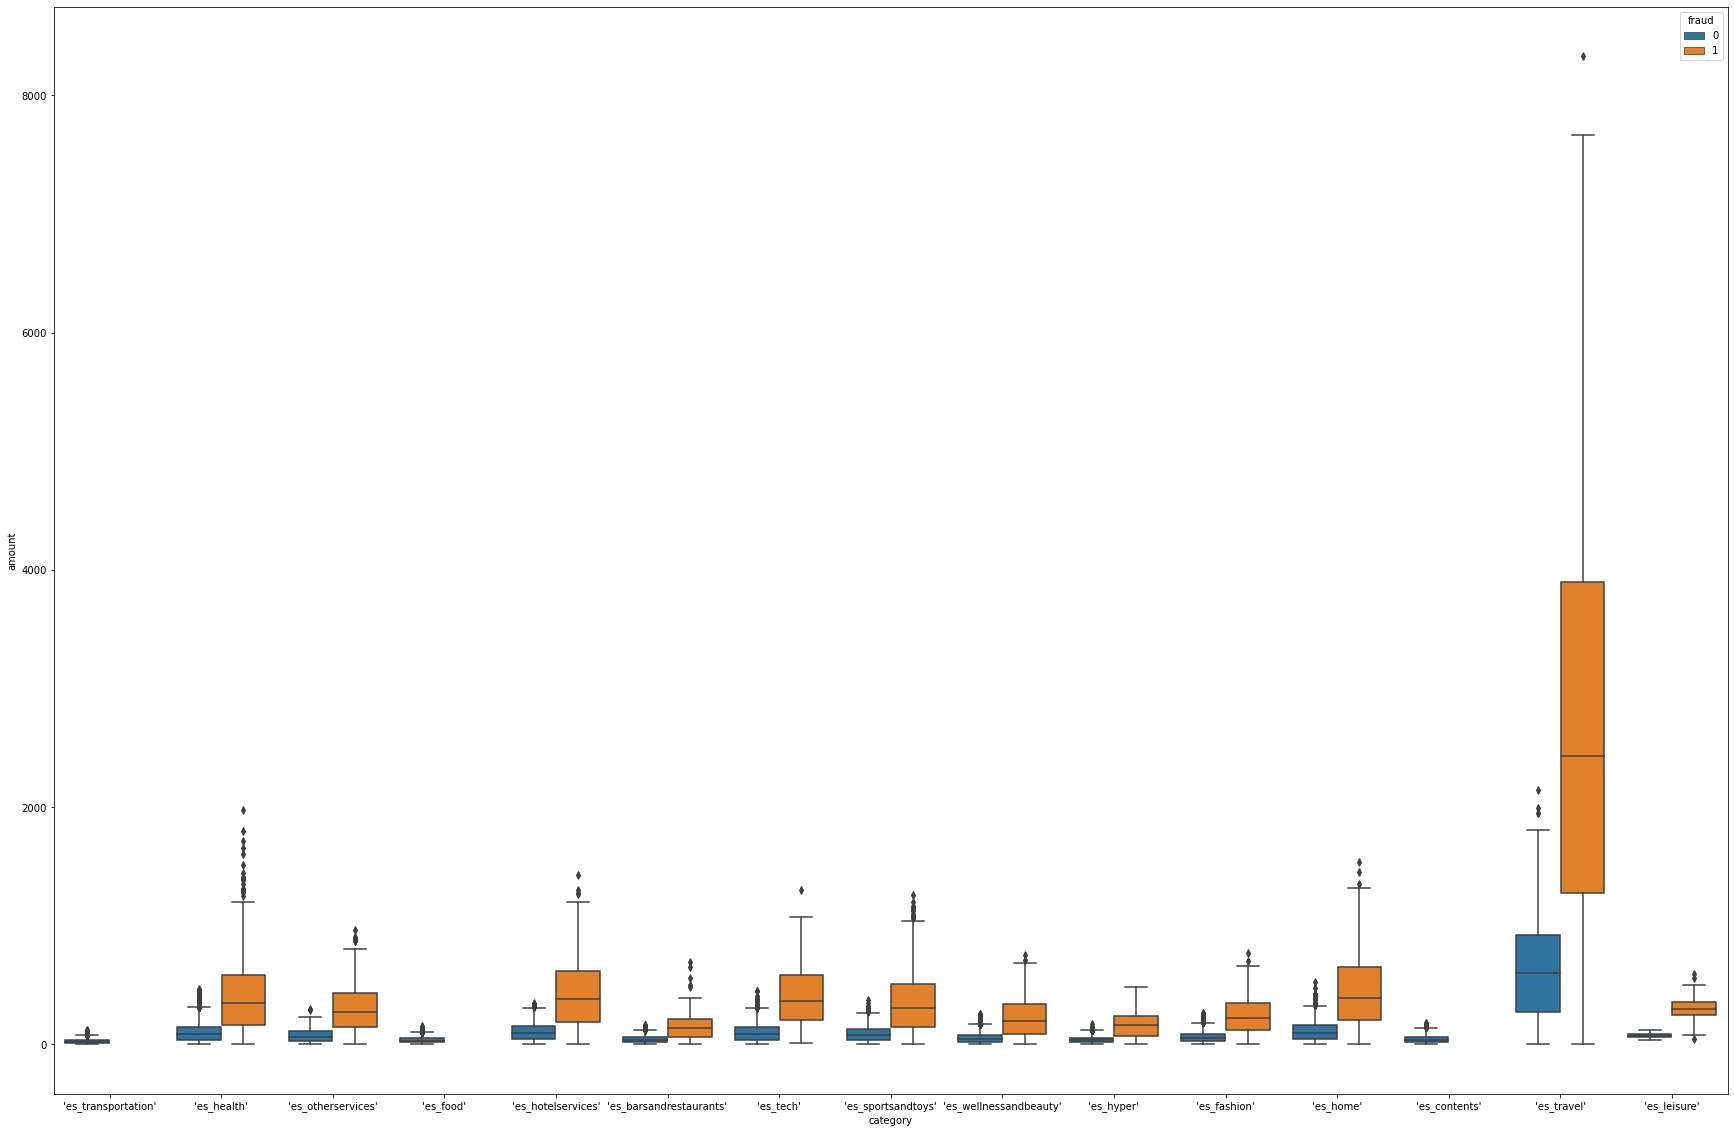

In [15]:
plt.figure(figsize=(30, 20))
sns.boxplot(x='category', y='amount', hue='fraud',data=BankSim_df)

- Max transactions where obseerved on 'es_travel' and the same time max defaulters rate also observed on es_travel. All feilds contains defaulter rate.'es_transportation' and 'es_contents' has only defaulter rate

#### Data Preparation

In [16]:
# Removing the '' from the dataset 
BankSim_df['gender'] = BankSim_df['gender'].str[1:-1]
BankSim_df['customer']=BankSim_df['customer'].str[1:-1]
BankSim_df['age']=BankSim_df['age'].str[1:-1]
BankSim_df['category']=BankSim_df['category'].str[1:-1]
BankSim_df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,C1093826151,4,M,'28007','M348934600','28007',es_transportation,4.55,0
1,0,C352968107,2,M,'28007','M348934600','28007',es_transportation,39.68,0
2,0,C2054744914,4,F,'28007','M1823072687','28007',es_transportation,26.89,0
3,0,C1760612790,3,M,'28007','M348934600','28007',es_transportation,17.25,0
4,0,C757503768,5,M,'28007','M348934600','28007',es_transportation,35.72,0


In [17]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.

dummy1 = pd.get_dummies(BankSim_df[['gender', 'category','age']], drop_first=True)

# Adding the results to the master dataframe
BankSim_df = pd.concat([BankSim_df, dummy1], axis=1)

In [18]:
BankSim_df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud,...,category_es_transportation,category_es_travel,category_es_wellnessandbeauty,age_1,age_2,age_3,age_4,age_5,age_6,age_U
0,0,C1093826151,4,M,'28007','M348934600','28007',es_transportation,4.55,0,...,1,0,0,0,0,0,1,0,0,0
1,0,C352968107,2,M,'28007','M348934600','28007',es_transportation,39.68,0,...,1,0,0,0,1,0,0,0,0,0
2,0,C2054744914,4,F,'28007','M1823072687','28007',es_transportation,26.89,0,...,1,0,0,0,0,0,1,0,0,0
3,0,C1760612790,3,M,'28007','M348934600','28007',es_transportation,17.25,0,...,1,0,0,0,0,1,0,0,0,0
4,0,C757503768,5,M,'28007','M348934600','28007',es_transportation,35.72,0,...,1,0,0,0,0,0,0,1,0,0


Dropping the repeated variables

In [19]:
# We have created dummies for the below variables, so we can drop them
BankSim_df=BankSim_df.drop(['step','zipcodeOri','merchant','zipMerchant','category','gender','age'],1)

In [20]:
BankSim_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer                       594643 non-null  object 
 1   amount                         594643 non-null  float64
 2   fraud                          594643 non-null  int64  
 3   gender_F                       594643 non-null  uint8  
 4   gender_M                       594643 non-null  uint8  
 5   gender_U                       594643 non-null  uint8  
 6   category_es_contents           594643 non-null  uint8  
 7   category_es_fashion            594643 non-null  uint8  
 8   category_es_food               594643 non-null  uint8  
 9   category_es_health             594643 non-null  uint8  
 10  category_es_home               594643 non-null  uint8  
 11  category_es_hotelservices      594643 non-null  uint8  
 12  category_es_hyper             

#### Checking for Outliers

In [21]:
# Checking for outliers in the continuous variables
num_BankSim_df = BankSim_df[['amount','fraud']]

In [22]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_BankSim_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,amount,fraud
count,594643.000000,594643.000000
mean,37.890135,0.012108
std,111.402831,0.109369
min,0.000000,0.000000
25%,13.740000,0.000000
50%,26.900000,0.000000
75%,42.540000,0.000000
90%,60.190000,0.000000
95%,79.280000,0.000000
99%,236.755800,1.000000


In [23]:
# removing (statistical) outliers
Q1 = BankSim_df.amount.quantile(0.05)
Q3 = BankSim_df.amount.quantile(0.95)
IQR = Q3 - Q1
BankSim_df = BankSim_df[(BankSim_df.amount >= Q1 - 1.5*IQR) & (BankSim_df.amount <= Q3 + 1.5*IQR)]

In [24]:
# Checking the percentage of missing values
round(100*(BankSim_df.isnull().sum()/len(BankSim_df.index)), 2)

customer                         0.0
amount                           0.0
fraud                            0.0
gender_F                         0.0
gender_M                         0.0
gender_U                         0.0
category_es_contents             0.0
category_es_fashion              0.0
category_es_food                 0.0
category_es_health               0.0
category_es_home                 0.0
category_es_hotelservices        0.0
category_es_hyper                0.0
category_es_leisure              0.0
category_es_otherservices        0.0
category_es_sportsandtoys        0.0
category_es_tech                 0.0
category_es_transportation       0.0
category_es_travel               0.0
category_es_wellnessandbeauty    0.0
age_1                            0.0
age_2                            0.0
age_3                            0.0
age_4                            0.0
age_5                            0.0
age_6                            0.0
age_U                            0.0
d

- No NULL value is present in data frame

#### Test-Train Split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
#  feature variable to X
X = BankSim_df.drop(['fraud','customer'], axis=1)
X.shape

(586596, 25)

In [27]:
# Putting response variable to y
y = BankSim_df['fraud']

y.shape

(586596,)

In [28]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

X_train[['amount']] = scaler.fit_transform(X_train[['amount']])

X_train.shape

(410617, 25)

In [31]:
### Checking the Fraud Rate
fraud = (sum(BankSim_df['fraud'])/len(BankSim_df['fraud'].index))*100
fraud

0.37027187365750874

We have almost 37% fraud rate

### Looking at Correlations

In [32]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

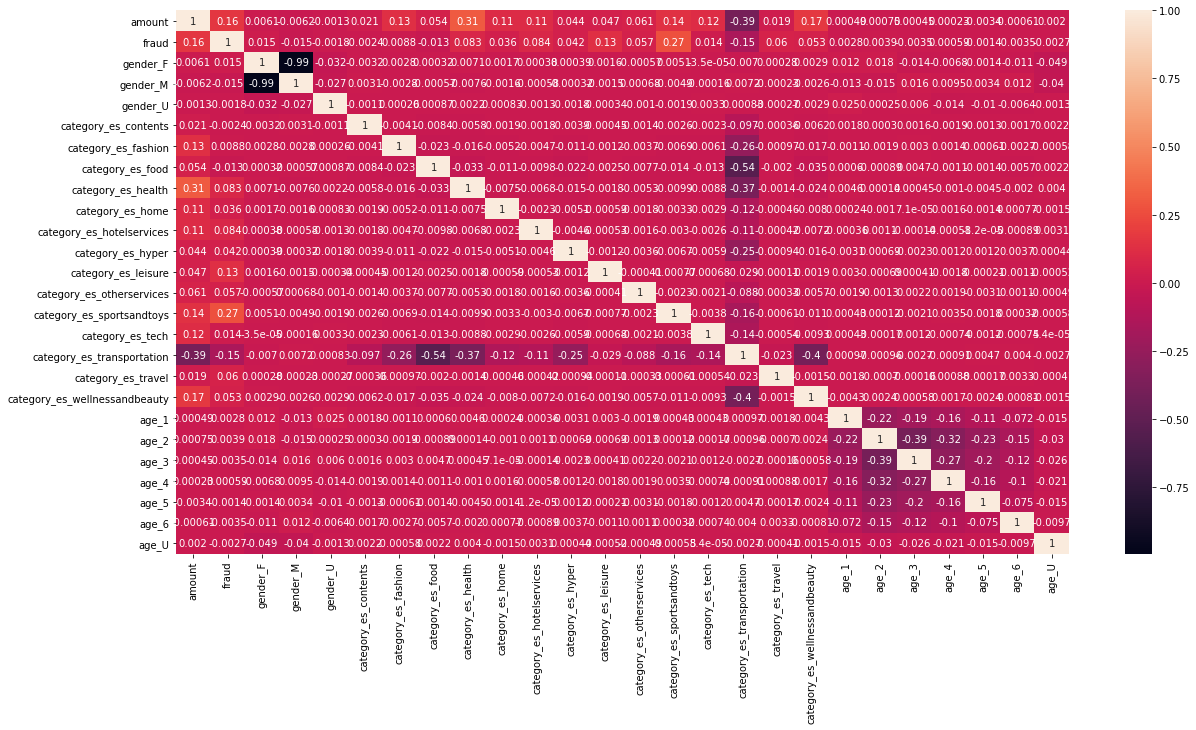

In [33]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(BankSim_df.corr(),annot = True)
plt.show()

### Model Building
Let's start by splitting our data into a training set and a test set.

Running Your First Training Model

In [34]:
import statsmodels.api as sm

In [35]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  fraud   No. Observations:               410617
Model:                            GLM   Df Residuals:                   410592
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 10 Jan 2021   Deviance:                          nan
Time:                        19:08:05   Pearson chi2:                 8.56e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -1.782e+15   1.52e+06  -1.17e+09      0.000   -1.78e+15   -1.78e+15
amount                         2.538e+13   1.19e+05   2.13e+08      0.000    2.54e+13    2.54e+13
gender_F                      -3.059e+14   1.09e+06   -2.8e+08      0.000   -3.06e+14   -3.06e+14
gender_M                      -3.975e+14    1.1e+06  -3.63e+08      0.000   -3.97e+14   -3.97e+14
gender_U                      -2.524e+14   2.93e+06   -8.6e+07      0.000   -2.52e+14   -2.52e+14
category_es_contents          -2.461e+15    2.9e+06  -8.48e+08      0.000   -2.46e+15   -2.46e+15
category_es_fashion           -5.536e+14   1.43e+06  -3.87e+08      0.000   -5.54e+14   -5.54e+14
category_es_food              -2.475e+15   1.12e+06  -2.21e+09      0.000   -2.48e+15   -2.48e+15
category_es_health             1.788e+15   1.24e+06   1.44e+09      0.000    1.79e+15    1.79e+15
category_es_home               1.675e+15   2.31e+06   7.25e+08      0.000    1.67e+15    1.67e+15
category_es_hotelservices      1.976e+15   2.56e+06   7.71e+08      0.000    1.98e+15    1.98e+15
category_es_hyper               1.09e+15   1.44e+06   7.57e+08      0.000    1.09e+15    1.09e+15
category_es_leisure            2.744e+15   9.11e+06   3.01e+08      0.000    2.74e+15    2.74e+15
category_es_otherservices     -2.649e+14    3.2e+06  -8.29e+07      0.000   -2.65e+14   -2.65e+14
category_es_sportsandtoys      1.646e+15    1.9e+06   8.66e+08      0.000    1.65e+15    1.65e+15
category_es_tech               6.443e+14   2.09e+06   3.08e+08      0.000    6.44e+14    6.44e+14
category_es_transportation    -2.466e+15   1.01e+06  -2.43e+09      0.000   -2.47e+15   -2.47e+15
category_es_travel             2.246e+15   1.17e+07   1.92e+08      0.000    2.25e+15    2.25e+15
category_es_wellnessandbeauty   1.86e+15   1.21e+06   1.54e+09      0.000    1.86e+15    1.86e+15
age_1                          1.085e+14   1.67e+06   6.51e+07      0.000    1.09e+14    1.09e+14
age_2                          1.178e+14   1.64e+06   7.16e+07      0.000    1.18e+14    1.18e+14
age_3                          8.537e+13   1.65e+06   5.18e+07      0.000    8.54e+13    8.54e+13
age_4                          1.053e+14   1.65e+06   6.37e+07      0.000    1.05e+14    1.05e+14
age_5                           9.97e+13   1.67e+06   5.99e+07      0.000    9.97e+13    9.97e+13
age_6                          4.168e+13   1.71e+06   2.44e+07      0.000    4.17e+13    4.17e+13
age_U                         -8.263e+14   2.25e+06  -3.67e+08      0.000   -8.26e+14   -8.26e+14
=================================================================================================
"""

In [36]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [37]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [38]:
rfe.support_

array([False,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False, False, False, False, False, False,  True])

In [39]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('amount', False, 4),
 ('gender_F', True, 1),
 ('gender_M', False, 11),
 ('gender_U', False, 2),
 ('category_es_contents', True, 1),
 ('category_es_fashion', True, 1),
 ('category_es_food', True, 1),
 ('category_es_health', True, 1),
 ('category_es_home', True, 1),
 ('category_es_hotelservices', True, 1),
 ('category_es_hyper', True, 1),
 ('category_es_leisure', True, 1),
 ('category_es_otherservices', True, 1),
 ('category_es_sportsandtoys', True, 1),
 ('category_es_tech', False, 3),
 ('category_es_transportation', True, 1),
 ('category_es_travel', True, 1),
 ('category_es_wellnessandbeauty', True, 1),
 ('age_1', False, 6),
 ('age_2', False, 5),
 ('age_3', False, 9),
 ('age_4', False, 7),
 ('age_5', False, 8),
 ('age_6', False, 10),
 ('age_U', True, 1)]

In [40]:
col = X_train.columns[rfe.support_]

In [41]:
X_train.columns[~rfe.support_]

Index(['amount', 'gender_M', 'gender_U', 'category_es_tech', 'age_1', 'age_2',
       'age_3', 'age_4', 'age_5', 'age_6'],
      dtype='object')

##### Assessing the model with StatsModels

In [42]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  fraud   No. Observations:               410617
Model:                            GLM   Df Residuals:                   410601
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5390.6
Date:                Sun, 10 Jan 2021   Deviance:                       10781.
Time:                        19:09:19   Pearson chi2:                 3.76e+04
No. Iterations:                    31                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -4.5787      0.120    -38.181      0.000      -4.814      -4.344
gender_F                          0.4808      0.058      8.229      0.000       0.366       0.595
category_es_contents            -28.2478   2.89e+05  -9.77e-05      1.000   -5.67e+05    5.67e+05
category_es_fashion              -0.3113      0.189     -1.645      0.100      -0.682       0.060
category_es_food                -28.2690   5.28e+04     -0.001      1.000   -1.03e+05    1.03e+05
category_es_health                0.9606      0.127      7.572      0.000       0.712       1.209
category_es_home                  1.2663      0.185      6.838      0.000       0.903       1.629
category_es_hotelservices         2.2202      0.159     13.962      0.000       1.909       2.532
category_es_hyper                 0.8248      0.145      5.704      0.000       0.541       1.108
category_es_leisure               5.1836      0.319     16.226      0.000       4.557       5.810
category_es_otherservices         2.1801      0.185     11.804      0.000       1.818       2.542
category_es_sportsandtoys         3.2071      0.126     25.444      0.000       2.960       3.454
category_es_transportation      -28.2690    1.2e+04     -0.002      0.998   -2.35e+04    2.35e+04
category_es_travel                3.8502      0.376     10.239      0.000       3.113       4.587
category_es_wellnessandbeauty     0.5145      0.131      3.914      0.000       0.257       0.772
age_U                           -26.5240   2.03e+05     -0.000      1.000   -3.98e+05    3.98e+05
=================================================================================================
"""

In [43]:
# Let's now check the VIFs 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,category_es_leisure,1.00
12,category_es_travel,1.00
9,category_es_otherservices,0.48
1,category_es_contents,0.16
10,category_es_sportsandtoys,0.13
6,category_es_hotelservices,0.06
14,age_U,0.05
5,category_es_home,0.03
7,category_es_hyper,0.03
4,category_es_health,0.02


In [44]:
col = col.drop('category_es_contents', 1)
col

Index(['gender_F', 'category_es_fashion', 'category_es_food',
       'category_es_health', 'category_es_home', 'category_es_hotelservices',
       'category_es_hyper', 'category_es_leisure', 'category_es_otherservices',
       'category_es_sportsandtoys', 'category_es_transportation',
       'category_es_travel', 'category_es_wellnessandbeauty', 'age_U'],
      dtype='object')

In [45]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  fraud   No. Observations:               410617
Model:                            GLM   Df Residuals:                   410602
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5398.3
Date:                Sun, 10 Jan 2021   Deviance:                       10797.
Time:                        19:09:42   Pearson chi2:                 3.82e+04
No. Iterations:                    31                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -4.6776      0.120    -39.055      0.000      -4.912      -4.443
gender_F                          0.4820      0.058      8.249      0.000       0.367       0.596
category_es_fashion              -0.2132      0.189     -1.127      0.260      -0.584       0.158
category_es_food                -28.1708   5.28e+04     -0.001      1.000   -1.03e+05    1.03e+05
category_es_health                1.0588      0.127      8.350      0.000       0.810       1.307
category_es_home                  1.3645      0.185      7.370      0.000       1.002       1.727
category_es_hotelservices         2.3184      0.159     14.585      0.000       2.007       2.630
category_es_hyper                 0.9230      0.145      6.386      0.000       0.640       1.206
category_es_leisure               5.2819      0.319     16.535      0.000       4.656       5.908
category_es_otherservices         2.2783      0.185     12.339      0.000       1.916       2.640
category_es_sportsandtoys         3.3053      0.126     26.238      0.000       3.058       3.552
category_es_transportation      -28.1708    1.2e+04     -0.002      0.998   -2.35e+04    2.35e+04
category_es_travel                3.9485      0.376     10.500      0.000       3.211       4.685
category_es_wellnessandbeauty     0.6127      0.131      4.664      0.000       0.355       0.870
age_U                           -26.5311   2.03e+05     -0.000      1.000   -3.98e+05    3.98e+05
=================================================================================================
"""

In [46]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,category_es_leisure,1.00
11,category_es_travel,1.00
8,category_es_otherservices,0.48
9,category_es_sportsandtoys,0.13
5,category_es_hotelservices,0.06
13,age_U,0.05
4,category_es_home,0.03
6,category_es_hyper,0.03
3,category_es_health,0.02
1,category_es_fashion,0.01


In [47]:
col = col.drop('category_es_food')
col

Index(['gender_F', 'category_es_fashion', 'category_es_health',
       'category_es_home', 'category_es_hotelservices', 'category_es_hyper',
       'category_es_leisure', 'category_es_otherservices',
       'category_es_sportsandtoys', 'category_es_transportation',
       'category_es_travel', 'category_es_wellnessandbeauty', 'age_U'],
      dtype='object')

In [48]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  fraud   No. Observations:               410617
Model:                            GLM   Df Residuals:                   410603
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5504.8
Date:                Sun, 10 Jan 2021   Deviance:                       11010.
Time:                        19:10:03   Pearson chi2:                 5.56e+04
No. Iterations:                    31                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -6.0312      0.119    -50.615      0.000      -6.265      -5.798
gender_F                          0.4836      0.058      8.279      0.000       0.369       0.598
category_es_fashion               1.1393      0.189      6.032      0.000       0.769       1.509
category_es_health                2.4113      0.126     19.089      0.000       2.164       2.659
category_es_home                  2.7170      0.185     14.701      0.000       2.355       3.079
category_es_hotelservices         3.6709      0.159     23.151      0.000       3.360       3.982
category_es_hyper                 2.2755      0.144     15.789      0.000       1.993       2.558
category_es_leisure               6.6345      0.319     20.782      0.000       6.009       7.260
category_es_otherservices         3.6308      0.184     19.700      0.000       3.270       3.992
category_es_sportsandtoys         4.6579      0.125     37.121      0.000       4.412       4.904
category_es_transportation      -26.8182    1.2e+04     -0.002      0.998   -2.35e+04    2.35e+04
category_es_travel                5.3010      0.376     14.103      0.000       4.564       6.038
category_es_wellnessandbeauty     1.9652      0.131     15.013      0.000       1.709       2.222
age_U                           -26.5464   2.05e+05     -0.000      1.000   -4.01e+05    4.01e+05
=================================================================================================
"""

In [49]:
col = col.drop('age_U')
col

Index(['gender_F', 'category_es_fashion', 'category_es_health',
       'category_es_home', 'category_es_hotelservices', 'category_es_hyper',
       'category_es_leisure', 'category_es_otherservices',
       'category_es_sportsandtoys', 'category_es_transportation',
       'category_es_travel', 'category_es_wellnessandbeauty'],
      dtype='object')

In [50]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  fraud   No. Observations:               410617
Model:                            GLM   Df Residuals:                   410604
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5507.6
Date:                Sun, 10 Jan 2021   Deviance:                       11015.
Time:                        19:10:14   Pearson chi2:                 5.57e+04
No. Iterations:                    31                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -6.0369      0.119    -50.661      0.000      -6.270      -5.803
gender_F                          0.4896      0.058      8.384      0.000       0.375       0.604
category_es_fashion               1.1397      0.189      6.034      0.000       0.770       1.510
category_es_health                2.4103      0.126     19.082      0.000       2.163       2.658
category_es_home                  2.7187      0.185     14.710      0.000       2.356       3.081
category_es_hotelservices         3.6674      0.159     23.132      0.000       3.357       3.978
category_es_hyper                 2.2760      0.144     15.792      0.000       1.994       2.558
category_es_leisure               6.6368      0.319     20.786      0.000       6.011       7.263
category_es_otherservices         3.6308      0.184     19.701      0.000       3.270       3.992
category_es_sportsandtoys         4.6573      0.125     37.118      0.000       4.411       4.903
category_es_transportation      -26.8185    1.2e+04     -0.002      0.998   -2.35e+04    2.35e+04
category_es_travel                5.3028      0.376     14.106      0.000       4.566       6.040
category_es_wellnessandbeauty     1.9657      0.131     15.017      0.000       1.709       2.222
=================================================================================================
"""

In [51]:
col = col.drop('category_es_transportation')
col

Index(['gender_F', 'category_es_fashion', 'category_es_health',
       'category_es_home', 'category_es_hotelservices', 'category_es_hyper',
       'category_es_leisure', 'category_es_otherservices',
       'category_es_sportsandtoys', 'category_es_travel',
       'category_es_wellnessandbeauty'],
      dtype='object')

In [52]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  fraud   No. Observations:               410617
Model:                            GLM   Df Residuals:                   410605
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5723.4
Date:                Sun, 10 Jan 2021   Deviance:                       11447.
Time:                        19:10:18   Pearson chi2:                 3.94e+05
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -8.7698      0.119    -73.725      0.000      -9.003      -8.537
gender_F                          0.4903      0.058      8.396      0.000       0.376       0.605
category_es_fashion               3.8721      0.189     20.513      0.000       3.502       4.242
category_es_health                5.1428      0.126     40.765      0.000       4.896       5.390
category_es_home                  5.4512      0.185     29.512      0.000       5.089       5.813
category_es_hotelservices         6.3999      0.158     40.400      0.000       6.089       6.710
category_es_hyper                 5.0085      0.144     34.786      0.000       4.726       5.291
category_es_leisure               9.3693      0.319     29.350      0.000       8.744       9.995
category_es_otherservices         6.3633      0.184     34.547      0.000       6.002       6.724
category_es_sportsandtoys         7.3897      0.125     58.971      0.000       7.144       7.635
category_es_travel                8.0353      0.376     21.377      0.000       7.299       8.772
category_es_wellnessandbeauty     4.6982      0.131     35.933      0.000       4.442       4.954
=================================================================================================
"""

In [53]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [54]:
y_train_pred[:10]

array([0.00015533, 0.00015533, 0.00015533, 0.0002536 , 0.0002536 ,
       0.0002536 , 0.0002536 , 0.0416169 , 0.00015533, 0.0002536 ])

In [55]:
y_train_pred_final = pd.DataFrame({'Fraud':y_train.values, 'Fraud_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Fraud,Fraud_Prob,CustID
0,0,0.000155,200447
1,0,0.000155,367264
2,0,0.000155,400802
3,0,0.000254,549131
4,0,0.000254,399659


In [56]:
y_train_pred_final['predicted'] = y_train_pred_final.Fraud_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Fraud,Fraud_Prob,CustID,predicted
0,0,0.000155,200447,0
1,0,0.000155,367264,0
2,0,0.000155,400802,0
3,0,0.000254,549131,0
4,0,0.000254,399659,0


In [57]:
y_train_pred_final['predicted'] = y_train_pred_final.Fraud_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Fraud,Fraud_Prob,CustID,predicted
0,0,0.000155,200447,0
1,0,0.000155,367264,0
2,0,0.000155,400802,0
3,0,0.000254,549131,0
4,0,0.000254,399659,0


In [58]:
from sklearn import metrics

In [59]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Fraud, y_train_pred_final.predicted )
print(confusion)

[[409110     16]
 [  1452     39]]


In [60]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Fraud, y_train_pred_final.predicted))

0.9964248922962274


In [61]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,category_es_leisure,1.00
9,category_es_travel,1.00
7,category_es_otherservices,0.48
8,category_es_sportsandtoys,0.13
4,category_es_hotelservices,0.06
3,category_es_home,0.03
5,category_es_hyper,0.03
2,category_es_health,0.02
1,category_es_fashion,0.01
0,gender_F,0.00


### Metrics beyond simply accuracy

In [62]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [63]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.026156941649899398

In [64]:
# Let us calculate specificity
TN / float(TN+FP)

0.9999608922434653

In [65]:
# Calculate false postive rate - predicting fraud when customer does not have fraud
print(FP/ float(TN+FP))

3.9107756534661696e-05


In [66]:
# positive predictive value 
print (TP / float(TP+FP))


0.7090909090909091


In [67]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9964633843365923


### Plotting the ROC Curve

In [68]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [69]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Fraud, y_train_pred_final.Fraud_Prob, drop_intermediate = False )

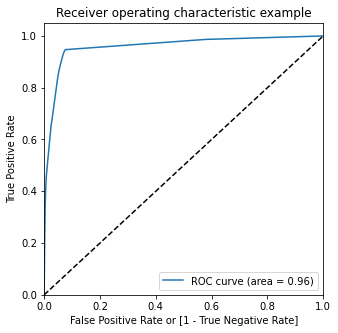

In [70]:
draw_roc(y_train_pred_final.Fraud, y_train_pred_final.Fraud_Prob)

### Making predictions on the test set

In [71]:
X_test[['amount']] = scaler.transform(X_test[['amount']])

In [72]:
X_test = X_test[col]
X_test.head()

,gender_F,category_es_fashion,category_es_health,category_es_home,category_es_hotelservices,category_es_hyper,category_es_leisure,category_es_otherservices,category_es_sportsandtoys,category_es_travel,category_es_wellnessandbeauty
482525,1,0,0,0,0,0,0,0,0,0,0
548559,1,1,0,0,0,0,0,0,0,0,0
379527,0,0,0,0,0,0,0,0,0,0,0
271422,1,0,0,0,0,0,0,0,0,0,0
483399,0,0,0,0,0,0,0,0,0,0,0


In [73]:
X_test_sm = sm.add_constant(X_test)

In [74]:
y_test_pred = res.predict(X_test_sm)

In [75]:
y_test_pred[:10]

482525    0.000254
548559    0.012040
379527    0.000155
271422    0.000254
483399    0.000155
573337    0.000254
205612    0.000155
26961     0.000155
153407    0.000254
356470    0.000155
dtype: float64

In [76]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [77]:
# Let's see the head
y_pred_1.head()

,0
482525,0.000254
548559,0.012040
379527,0.000155
271422,0.000254
483399,0.000155


In [78]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [79]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [80]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [81]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [82]:
y_pred_final.head()

,fraud,CustID,0
0,0,482525,0.000254
1,0,548559,0.012040
2,0,379527,0.000155
3,0,271422,0.000254
4,0,483399,0.000155


In [83]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Fraud_Prob'})

In [84]:
# Let's see the head of y_pred_final
y_pred_final.head()

,fraud,CustID,Fraud_Prob
0,0,482525,0.000254
1,0,548559,0.012040
2,0,379527,0.000155
3,0,271422,0.000254
4,0,483399,0.000155


In [85]:
y_pred_final['final_predicted'] = y_pred_final.Fraud_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [86]:
y_pred_final.head()

,fraud,CustID,Fraud_Prob,final_predicted
0,0,482525,0.000254,0
1,0,548559,0.012040,0
2,0,379527,0.000155,0
3,0,271422,0.000254,0
4,0,483399,0.000155,0


In [88]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.fraud, y_pred_final.final_predicted)

0.9961586325641127

In [89]:
confusion2 = metrics.confusion_matrix(y_pred_final.fraud, y_pred_final.final_predicted )
confusion2

array([[175284,     14],
       [   662,     19]], dtype=int64)

In [90]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [91]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.027900146842878122

In [92]:
# Let us calculate specificity
TN / float(TN+FP)

0.999920135996988